# Phương trình tay máy

In [ ]:
import numpy as np
a_s = [79.99202019855866, 38.16140276531835, 55.58261128955843]


a_r0 = (a_s[0]*np.pi)/180
a_r1 = (a_s[1]*np.pi)/180
a_r2 = (a_s[2]*np.pi)/180


print("input :", a_r0, a_r1, a_r2)
q1 = np.pi/2 - a_r0
q2 = a_r1
q3 = a_r2 + a_r1
L0 = 7.5
L1 = 8
L2 = 11.5



x = L1*np.cos(q2)*np.cos(q1) + L2*np.cos(q3-q2)*np.cos(q1)
y = L1*np.cos(q2)*np.sin(q1) + L2*np.cos(q3-q2)*np.sin(q1)
z = L1*np.sin(q2) - L2*np.sin(q3-q2) + L0

print(x, y, z)

In [ ]:
x, y, z = 12.595565319715629, 2.222746821126286, 2.956197927537474
# x 4 - 13
# y = 4 - 10
# z = 0 - 5

a_1 = np.arctan(y/x)

n = z-L0
m = x*np.cos(a_1) + y*np.sin(a_1)

a_3 = np.arccos((np.power(m,2) + np.power(n,2) - np.power(L1,2) - np.power(L2,2))/(2*L1*L2))

u = L1 + L2*np.cos(a_3)
v = L2 * np.sin(a_3)

a_2 = np.arccos((u*m-v*n)/(u**2 + v**2))

a_r0 = np.pi/2 - a_1
a_r1 = a_2 
a_r2 = a_3 - a_2
# a_r0 = a_1
# a_r1 = a_2 
# a_r2 = a_3 

print(a_r0*180/np.pi, a_r1*180/np.pi, a_r2*180/np.pi)

# Xử lý dữ liệu ảnh

In [ ]:
import cv2

import numpy as np


# Create a VideoCapture object

cap = cv2.VideoCapture("C:/Users/Hero/OneDrive/Máy tính/video.mp4")


# Check if camera opened successfully

if (cap.isOpened() == False): 

  print("Unable to read camera feed")


frame_width = int(cap.get(3))
frame_height = int(cap.get(4))


# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.

out = cv2.VideoWriter('outpy.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))


while(True):

  ret, frame = cap.read()


  if ret == True: 
    out.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):

      break
  else:

    break 
cap.release()

out.release()

cv2.destroyAllWindows() 

# Xử lý dữ liệu bảng 

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:/User/DLBot/scripts/data/angles_pro.csv")
# df.head()
data = np.array(df)
# X = np.array(data[:,0:8], dtype=np.double)/400
# y = np.array(data[:,8:12], dtype=np.double)*np.pi/180
df.head(5)

In [ ]:
L0 = 7.5
L1 = 8
L2 = 11.5
def donghocthuan(q):
    q1 = np.pi/2 - q[0]
    q2 = q[1]
    q3 = q[2] + q[1]
    x = L1*np.cos(q2)*np.cos(q1) + L2*np.cos(q3-q2)*np.cos(q1)
    y = L1*np.cos(q2)*np.sin(q1) + L2*np.cos(q3-q2)*np.sin(q1)
    z = L1*np.sin(q2) - L2*np.sin(q3-q2) + L0
    return x, y, z, q[3]

def donghocnguoc(x, y, z):
    a_1 = np.arctan(y/x)

    n = z-L0
    m = x*np.cos(a_1) + y*np.sin(a_1)

    a_3 = np.arccos((m**2 + n**2 - L1**2 - L2**2)/(2*L1*L2))

    u = L1 + L2*np.cos(a_3)
    v = L2 * np.sin(a_3)

    a_2 = np.arccos((u*m-v*n)/(u**2 + v**2))

    a_r0 = np.pi/2 - a_1
    a_r1 = a_2 
    a_r2 = a_3 - a_2

    return int(a_r0*180/np.pi), int(a_r1*180/np.pi), int(a_r2*180/np.pi)

def center_box(box):
    x, y = box[0]+(box[2] - box[0])/2, box[1]+(box[3] - box[1])/2
    w, h = (box[2] - box[0]), (box[3] - box[1])
    return x, y, w, h

In [ ]:
data_create = []
for idx, dta in enumerate(X):
    box_1, box_2 = dta[:4], dta[4:]
    # x, y, w, h = center_box(box_1)
    # print(x,y,w,h)
    # print(idx)
    data_frame = np.hstack(
                        [center_box(box_1), center_box(box_2), donghocthuan(y[idx])])
    data_create.append(data_frame)
# df = pd.read_csv("D:/User/DLBot/scripts/data/angles_pro.csv")
df2 = pd.DataFrame(data_create, columns=['x1','y1','w1','h1','x2','y2','w2','h2','a1','a2','a3','a4'])
# df2 = pd.concat([df, df2])
df2.to_csv(
    "D:/User/DLBot/scripts/data/angles_pro.csv", index=False)
data_create

In [12]:
def create_batch_data(Train_X, Train_y, batch):
    X, y = [], []
    XX, yy = [], []
    j=0
    while j < len(Train_y):
        X.append(Train_X[j])
        y.append(Train_y[j])
        if (j+1)%batch==0:
            XX.append(X)
            yy.append(y)
            X, y = [], []
        j+=1
    return np.array(XX), np.array(yy)

# Training

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from model_ANN import ANN
import torch.nn as nn
import tqdm
import torch

df = pd.read_csv("D:/User/DLBot/scripts/data/angles_pro.csv")
# df.head()
data = np.array(df)
X = np.array(data[:,0:8], dtype=np.double)
y = np.array(data[:,8:12], dtype=np.double)*10

X = np.concatenate([X, X])
y = np.concatenate([y, y])
Train_X, Val_X, Train_y, Val_y = train_test_split(X, y, test_size=0.2)
X_train, y_train = create_batch_data(Train_X, Train_y, 64)
X_val, y_val = create_batch_data(Val_X, Val_y, 64)
len(y)
# df.head(5)

1032

In [14]:
def study(model, X, y, optimizer, losses, device):
    model.train()
    train_loss = 0
    # counter = 0
    # print ("@@@ Start train model @@@")
    for i, data in enumerate(X):
        # counter += 1
        image, label = torch.tensor(data,dtype=torch.float32), torch.tensor(y[i],dtype=torch.float32)
        image = image.to(device)
        label =label.to(device)
        optimizer.zero_grad()
        label_pre = model(image)
        # print(label_pre.shape)
        loss = losses(label_pre, label)
        train_loss += loss.item()
        # print(train_loss)
        loss.backward()
        optimizer.step()
        # print(preds)
    epoch_loss = train_loss / len(X)

    return epoch_loss


In [15]:
def val(model, X, y, losses, device):
    val_loss = 0
    # counter = 0
    # print ("@@@ Start train model @@@")
    for i, data in enumerate(X):
        # counter += 1
        image, label = torch.tensor(data,dtype=torch.float32), torch.tensor(y[i],dtype=torch.float32)
        image = image.to(device)
        label =label.to(device)
        label_pre = model(image)
        # print(label_pre.shape)
        loss = losses(label_pre, label)
        val_loss += loss.item()
        # print(train_loss)
        # loss.backward()
        # print(preds)
    epoch_loss = val_loss / len(X)

    return epoch_loss

In [31]:
import torch.optim as optim

PATH = "D:/User/DLBot/scripts/model/model_auto_arm_pro.pt"
learning_rate = 0.01
model = ANN()
model.load_state_dict(torch.load(PATH))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
# Loss function.
# losses = nn.CrossEntropyLoss()
losses = nn.MSELoss()
loss_tr = []
loss_va = []
maxv = 100.0
# evaluate a model using repeated k-fold cross-validation
for i in range(10000):
    train_loss = study(model, X_train,y_train, optimizer, losses, device)
    val_loss = val(model,X_val, y_val,losses, device)
    loss_tr.append(train_loss)
    loss_va.append(val_loss)
    if val_loss < maxv:
        maxv = val_loss
        print("Save model complete!", PATH)
        torch.save(model.state_dict(), PATH)

    if i%100==0:
        print('epoch: ',i, 'Train loss: ', train_loss)
        print('       ',i, 'Val loss: ', val_loss)

# torch.save(model.state_dict(), PATH)

cpu
epoch:  0 Train loss:  47.77964448928833
        0 Val loss:  101.84840901692708
Save model complete! D:/User/DLBot/scripts/model/model_auto_arm_pro.pt
Save model complete! D:/User/DLBot/scripts/model/model_auto_arm_pro.pt
Save model complete! D:/User/DLBot/scripts/model/model_auto_arm_pro.pt
Save model complete! D:/User/DLBot/scripts/model/model_auto_arm_pro.pt
Save model complete! D:/User/DLBot/scripts/model/model_auto_arm_pro.pt
Save model complete! D:/User/DLBot/scripts/model/model_auto_arm_pro.pt
Save model complete! D:/User/DLBot/scripts/model/model_auto_arm_pro.pt
epoch:  100 Train loss:  37.765264670054115
        100 Val loss:  92.92535146077473
Save model complete! D:/User/DLBot/scripts/model/model_auto_arm_pro.pt
epoch:  200 Train loss:  44.22000233332316
        200 Val loss:  92.5582275390625
epoch:  300 Train loss:  59.33122539520264
        300 Val loss:  128.97383626302084
epoch:  400 Train loss:  41.14464092254639
        400 Val loss:  92.47225189208984
Save model

In [8]:
torch.save(model.state_dict(), PATH)


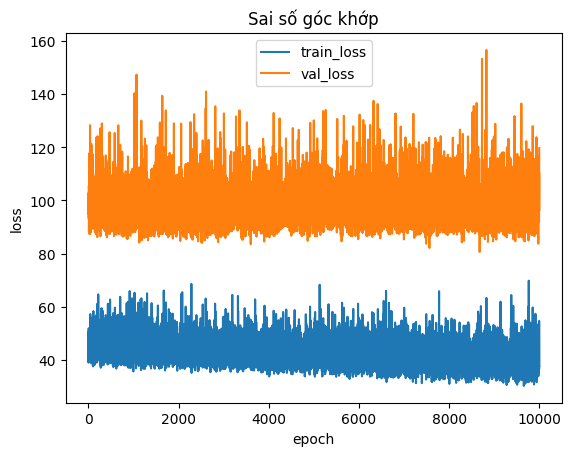

In [32]:
import matplotlib.pyplot as plt

plt.title('Sai số góc khớp')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(loss_tr, label='train_loss')
plt.plot(loss_va, label='val_loss')
plt.legend()

plt.show()

In [39]:
the_model = ANN()
the_model.load_state_dict(torch.load(PATH))
test_arr = torch.tensor([Train_X[100:105]],dtype=torch.float32)
print(np.array(Train_y[100:105]))
test_arr
# test_arr*400

[[122.45798683 -42.16566633  18.67751493   2.7925268 ]
 [103.90729242 -18.32165915  48.23406321   2.61799388]
 [109.69474397  15.41659088  21.12023577   3.31612558]
 [ 95.65029546   1.66958212   5.80953262   2.96705973]
 [ 89.23505468  -4.67661105  31.52909176   3.14159265]]


tensor([[[0.3550, 0.5550, 0.3550, 0.2200, 0.8188, 0.4988, 0.3025, 0.1975],
         [0.5487, 0.1475, 0.4175, 0.2900, 0.8363, 0.1262, 0.3275, 0.2525],
         [0.3150, 0.7887, 0.6250, 0.4225, 0.4712, 0.6625, 0.4325, 0.2950],
         [0.8650, 0.6725, 0.2700, 0.3050, 0.9175, 0.6837, 0.1600, 0.2975],
         [0.7900, 0.2887, 0.4150, 0.3575, 0.8375, 0.2763, 0.3250, 0.3325]]])

In [41]:
output = the_model(test_arr)
ou = np.array(output.detach().numpy()[0])
# output[0]
# ou
# print(donghocnguoc(11,-3,3))
# donghocthuan(np.array([168, 130, -52, 17], dtype=np.float16)*np.pi/180)
# for out in ou:
# np.array(output//10, dtype=np.uint8)
ou

array([[124.03352  , -44.07876  ,  19.018225 ,   3.098257 ],
       [102.5363   , -20.562855 ,  50.71254  ,   2.9494512],
       [115.14345  ,   8.185673 ,  29.514004 ,   3.0258446],
       [ 94.76612  ,   1.2659591,   5.4931717,   2.9228365],
       [ 88.90517  ,  -5.0347686,  30.157915 ,   2.9801676]],
      dtype=float32)

In [25]:
(ou - np.array(Val_y[:5]))//10

array([[ 1.,  5., -1.,  0.],
       [-3., -2.,  2., -1.],
       [ 1., -4., -1., -1.],
       [ 1., -2.,  0., -1.],
       [ 3., -1.,  0.,  0.]])

# Visualize